# Redimensionnement du data set 1


In [1]:
from PIL import Image, UnidentifiedImageError
import os
# Create DataFrames for training and test data
TRAIN_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/train"
TEST_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/test"
# Fonction pour redimensionner une image
def redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie):
    try:
        image = Image.open(chemin_image)

        # Convertir l'image en mode RVB si elle est en mode RGBA
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        image_redimensionnee = image.resize(nouvelle_taille)
        image_redimensionnee.save(chemin_sortie)
        image.close()

        # Supprimer l'image initiale
        os.remove(chemin_image)
    except (UnidentifiedImageError, OSError) as e:
        print(f"Erreur lors du traitement de {chemin_image}: {e}")

# Dossier racine train
dossier_racine1 = TRAIN_DIR

# Spécifier la nouvelle taille en pixels (largeur, hauteur)
nouvelle_taille = (48, 48)

# Parcourir récursivement les sous-dossiers
for dossier_parent, sous_dossiers, fichiers in os.walk(dossier_racine1):
    for fichier in fichiers:
        if fichier.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            chemin_image = os.path.join(dossier_parent, fichier)
            chemin_sortie = os.path.join(dossier_parent, "redimensionnee_" + fichier)
            try:
                redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie)
            except Exception as e:
                print(f"Erreur lors du traitement de {chemin_image}: {e}")

print("Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.")

# Dossier racine test
dossier_racine2 = TEST_DIR

# Spécifier la nouvelle taille en pixels (largeur, hauteur)
nouvelle_taille = (48, 48)

# Parcourir récursivement les sous-dossiers
for dossier_parent, sous_dossiers, fichiers in os.walk(dossier_racine2):
    for fichier in fichiers:
        if fichier.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            chemin_image = os.path.join(dossier_parent, fichier)
            chemin_sortie = os.path.join(dossier_parent, "redimensionnee_" + fichier)
            try:
                redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie)
            except Exception as e:
                print(f"Erreur lors du traitement de {chemin_image}: {e}")

print("Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.")


Erreur lors du traitement de C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/train\surprise\redimensionnee_redimensionnee_redimensionnee_redimensionnee_redimensionnee_Training_15636482.jpg: cannot identify image file 'C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/train\\surprise\\redimensionnee_redimensionnee_redimensionnee_redimensionnee_redimensionnee_Training_15636482.jpg'
Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.
Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Création du data frame

In [3]:
# Function to create a DataFrame with image paths and labels
def create_dataframe(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for imagename in os.listdir(os.path.join(directory, label)):
            image_paths.append(os.path.join(directory, label, imagename))
            labels.append(label)
        print(label, "completed")
    return pd.DataFrame({'image': image_paths, 'label': labels})# Create DataFrames for training and test data


In [4]:
TRAIN_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/train"
TEST_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/test"
train = create_dataframe(TRAIN_DIR)
test = create_dataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


# Features extracting

In [5]:
def extract_features(images, target_size=(48, 48)):
    features = []
    for image_path in tqdm(images):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger l'image en niveaux de gris avec OpenCV
        if image is not None:
            # Assurez-vous que toutes les images ont les mêmes dimensions avant le redimensionnement
            if image.shape[0] != target_size[0] or image.shape[1] != target_size[1]:
                image = cv2.resize(image, (target_size[1], target_size[0]))  # OpenCV utilise (largeur, hauteur)
            image = np.reshape(image, (target_size[0], target_size[1], 1))
            features.append(image)

    features = np.array(features)
    return features


In [6]:
# Preprocess and extract features for training and test data
train_features = extract_features(train['image'], target_size=(48, 48))
test_features = extract_features(test['image'], target_size=(48, 48))




100%|█████████████████████████████████████████████████████████████████████████████| 7176/7176 [00:33<00:00, 215.71it/s]


# Label encoding

In [7]:
# Normalize the features
x_train = train_features / 255.0
x_test = test_features / 255.0

# Encode labels using LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)


In [8]:
# Display the distribution of classes before balancing
print("Distribution des classes avant l'équilibrage:")
print(Counter(train['label']))

Distribution des classes avant l'équilibrage:
Counter({'happy': 7213, 'neutral': 4964, 'sad': 4828, 'fear': 4097, 'angry': 3988, 'surprise': 3170, 'disgust': 436})


# Création du model pour les images en niveaux de gris

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler
# Define a learning rate schedule function
# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    initial_learning_rate = 0.001
    decay_factor = 0.7
    decay_steps = 4
    return initial_learning_rate * decay_factor**(epoch // decay_steps)

# Set up the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


In [18]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam
# Build the model
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Training

In [19]:
from keras.callbacks import EarlyStopping

# Calculez les poids de classe
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Créez un dictionnaire de poids de classe
class_weight_dict = dict(enumerate(class_weights))

# Définir une condition d'arrêt anticipé
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# Train the model with early stopping and class weights
history = model.fit(
    x_train, y_train_encoded,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test_encoded),
    callbacks=[lr_scheduler, early_stopping],
    class_weight=class_weight_dict,  # Utilisez les poids de classe ici
    shuffle=True
)


Epoch 1/100
897/897 [==============================] - 225s 248ms/step - loss: 2.3019 - accuracy: 0.1685 - val_loss: 2.3387 - val_accuracy: 0.1715 - lr: 0.0010
Epoch 2/100
897/897 [==============================] - 215s 240ms/step - loss: 1.8238 - accuracy: 0.2744 - val_loss: 1.6679 - val_accuracy: 0.3477 - lr: 0.0010
Epoch 3/100
897/897 [==============================] - 215s 240ms/step - loss: 1.6224 - accuracy: 0.3689 - val_loss: 1.7091 - val_accuracy: 0.3645 - lr: 0.0010
Epoch 4/100
897/897 [==============================] - 218s 243ms/step - loss: 1.5013 - accuracy: 0.4194 - val_loss: 1.5665 - val_accuracy: 0.3863 - lr: 0.0010
Epoch 5/100
897/897 [==============================] - 215s 240ms/step - loss: 1.3700 - accuracy: 0.4658 - val_loss: 1.3003 - val_accuracy: 0.5065 - lr: 7.0000e-04
Epoch 6/100
897/897 [==============================] - 214s 239ms/step - loss: 1.2739 - accuracy: 0.5003 - val_loss: 1.2791 - val_accuracy: 0.5184 - lr: 7.0000e-04
Epoch 7/100
897/897 [===========

# Evaluation

225/225 [==============================] - 14s 61ms/step


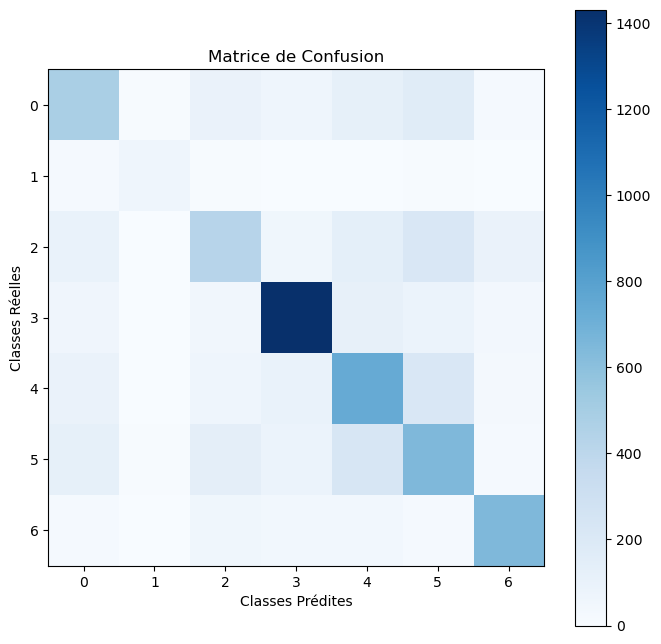

Rapport de Classification :
              precision    recall  f1-score   support

       angry       0.54      0.51      0.52       957
     disgust       0.69      0.60      0.64       111
        fear       0.51      0.41      0.46      1024
       happy       0.80      0.81      0.81      1773
     neutral       0.53      0.60      0.56      1233
         sad       0.48      0.52      0.50      1247
    surprise       0.77      0.78      0.77       831

    accuracy                           0.62      7176
   macro avg       0.62      0.60      0.61      7176
weighted avg       0.62      0.62      0.62      7176



In [21]:
# Prédire les probabilités des classes sur l'ensemble de test
y_pred_probs = model.predict(x_test)

# Convertir les probabilités en classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Convertir les étiquettes encodées en classes réelles
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test_classes, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

# Afficher le rapport de classification
class_names = le.classes_
print("Rapport de Classification :")
print(classification_report(y_test_classes, y_pred, target_names=class_names))


225/225 [==============================] - 14s 62ms/step


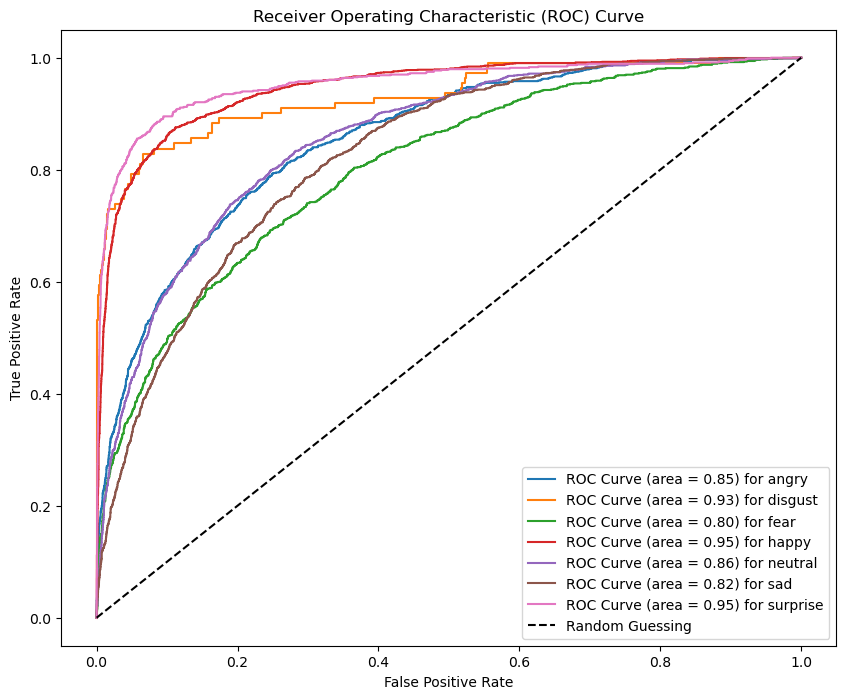

In [23]:
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour chaque classe
y_score = model.predict(x_test)

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [24]:
# Sauvegarder le modèle
model.save("C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/modele_gray.h5")


C:\Users\bdhia\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Fonction pour prétraiter une image
def preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        return None

    x, y, w, h = faces[0]
    eyes_roi = (y, y + h//4, x, x + w)
    nose_roi = (y + h//4, y + 3*h//4, x, x + w)
    mouth_roi = (y + 2*h//3, y + h, x, x + w)

    binary_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Créer une image vide avec les mêmes dimensions que l'originale
    result = np.zeros_like(image)

    # Appliquer la binarisation aux régions d'intérêt
    result[eyes_roi[0]:eyes_roi[1], eyes_roi[2]:eyes_roi[3], :] = cv2.cvtColor(binary_image[eyes_roi[0]:eyes_roi[1], eyes_roi[2]:eyes_roi[3]], cv2.COLOR_GRAY2BGR)
    result[nose_roi[0]:nose_roi[1], nose_roi[2]:nose_roi[3], :] = cv2.cvtColor(binary_image[nose_roi[0]:nose_roi[1], nose_roi[2]:nose_roi[3]], cv2.COLOR_GRAY2BGR)
    result[mouth_roi[0]:mouth_roi[1], mouth_roi[2]:mouth_roi[3], :] = cv2.cvtColor(binary_image[mouth_roi[0]:mouth_roi[1], mouth_roi[2]:mouth_roi[3]], cv2.COLOR_GRAY2BGR)

    # Redimensionner l'image prétraitée à la taille spécifiée
    result = cv2.resize(result, (target_size[1], target_size[0]))  # OpenCV utilise (largeur, hauteur)

    return img_to_array(result)

# Résultats des prédictions du premier modele

1/1 [==============================] - 0s 64ms/step


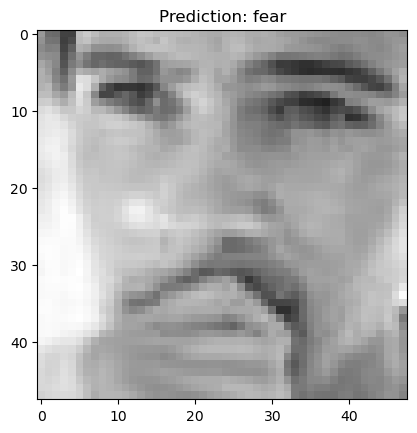

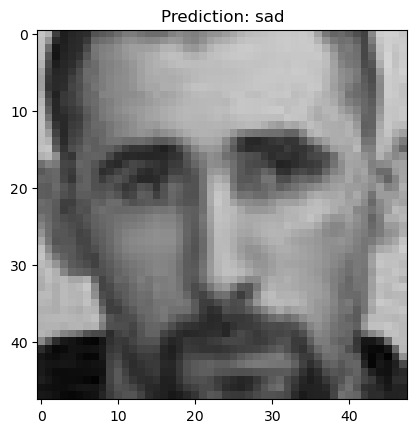

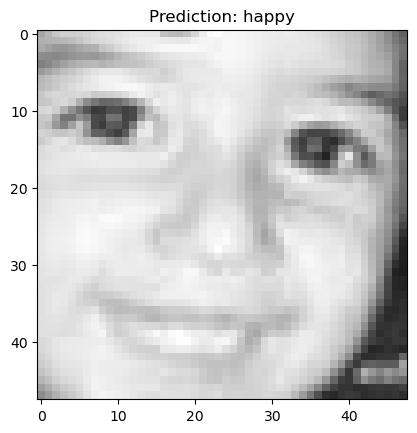

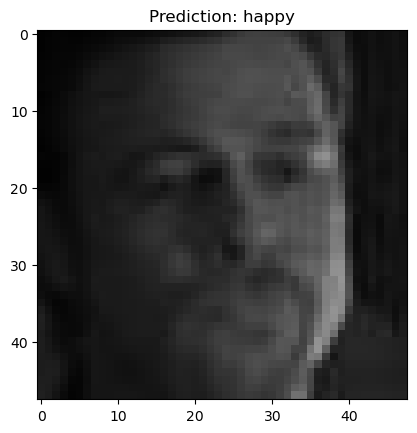

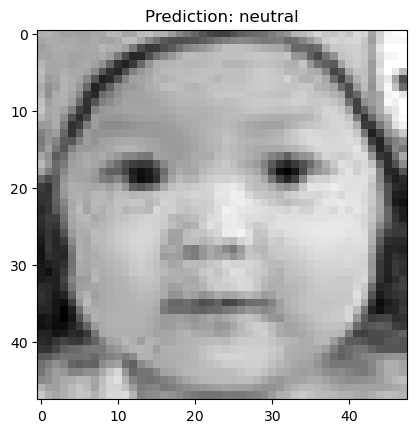

In [43]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


classes = os.listdir("C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/train")

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(classes)

# Chemin vers le dossier de test
TEST_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/Data_set1/test"

# Liste de toutes les images dans le dossier de test
all_test_images = []
for label in classes:
    label_path = os.path.join(TEST_DIR, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        image_paths = [os.path.join(label_path, img) for img in image_files]
        all_test_images.extend(image_paths)

# Nombre d'images à choisir au hasard
num_random_images = 5  # Vous pouvez ajuster cela en fonction de vos besoins

# Choisissez des images au hasard
random_test_images = random.sample(all_test_images, num_random_images)

# Charger les images aléatoires
random_images = []
for image_path in random_test_images:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        # Assurez-vous que toutes les images ont les mêmes dimensions avant le redimensionnement
        target_size = (48, 48)  # ou la taille que vous avez utilisée lors de l'entraînement
        if image.shape[0] != target_size[0] or image.shape[1] != target_size[1]:
            image = cv2.resize(image, (target_size[1], target_size[0]))  # OpenCV utilise (largeur, hauteur)
        image = np.reshape(image, (target_size[0], target_size[1], 1))
        random_images.append(image)

# Vérifier si des images aléatoires ont été chargées
if random_images:
    # Convertir en tableau numpy et normaliser les valeurs des pixels
    random_images = np.array(random_images) / 255.0

    # Faire des prédictions sur les images aléatoires
    random_predictions = model.predict(random_images)

    # Afficher les prédictions pour chaque image aléatoire
    for i, (image_path, prediction) in enumerate(zip(random_test_images, random_predictions)):
        # Afficher l'image
        img = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        # Obtenir la classe prédite
        predicted_class = np.argmax(prediction)
        
        # Convertir la classe prédite en texte de label
        predicted_label = label_encoder.classes_[predicted_class]
        
        # Afficher la prédiction
        plt.title(f"Prediction: {predicted_label}")
        
        # Afficher l'image avec la légende
        plt.show()
else:
    print("Aucune image aléatoire chargée.")


# Prédiction des photos prises par camera

In [ ]:
# Utiliser la caméra
cap = cv2.VideoCapture(0)  # 0 indique la première caméra disponible, ajustez si nécessaire

while True:
    # Capturer une image depuis la caméra
    ret, frame = cap.read()

    # Afficher l'image capturée
    cv2.imshow("Capture", frame)

    # Attendre une touche pour prendre une photo (touche 'c' dans cet exemple)
    key = cv2.waitKey(1)
    if key == ord('c'):
        # Prétraiter l'image capturée
        preprocessed_image = preprocess_image(frame)

        if preprocessed_image is not None:
            # Normaliser les valeurs des pixels
            preprocessed_image = preprocessed_image / 255.0

            # Ajouter une dimension supplémentaire pour correspondre à la forme d'entrée du modèle
            preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

            # Faire une prédiction sur l'image capturée
            prediction = model.predict(preprocessed_image)

            # Afficher la prédiction
            print("Prédiction du sentiment :", prediction)

    # Sortir de la boucle si la touche 'q' est pressée
    elif key == ord('q'):
        break

# Libérer la caméra et fermer la fenêtre
cap.release()
cv2.destroyAllWindows()

# redimensionnement du data set 2

In [25]:
from PIL import Image, UnidentifiedImageError
import os
# Create DataFrames for training and test data
TRAIN_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/data_set2/train"
TEST_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/data_set2/test"
# Fonction pour redimensionner une image
def redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie):
    try:
        image = Image.open(chemin_image)

        # Convertir l'image en mode RVB si elle est en mode RGBA
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        image_redimensionnee = image.resize(nouvelle_taille)
        image_redimensionnee.save(chemin_sortie)
        image.close()

        # Supprimer l'image initiale
        os.remove(chemin_image)
    except (UnidentifiedImageError, OSError) as e:
        print(f"Erreur lors du traitement de {chemin_image}: {e}")

# Dossier racine train
dossier_racine1 = TRAIN_DIR

# Spécifier la nouvelle taille en pixels (largeur, hauteur)
nouvelle_taille = (48, 48)

# Parcourir récursivement les sous-dossiers
for dossier_parent, sous_dossiers, fichiers in os.walk(dossier_racine1):
    for fichier in fichiers:
        if fichier.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            chemin_image = os.path.join(dossier_parent, fichier)
            chemin_sortie = os.path.join(dossier_parent, "redimensionnee_" + fichier)
            try:
                redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie)
            except Exception as e:
                print(f"Erreur lors du traitement de {chemin_image}: {e}")

print("Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.")

# Dossier racine test
dossier_racine2 = TEST_DIR

# Spécifier la nouvelle taille en pixels (largeur, hauteur)
nouvelle_taille = (48, 48)

# Parcourir récursivement les sous-dossiers
for dossier_parent, sous_dossiers, fichiers in os.walk(dossier_racine2):
    for fichier in fichiers:
        if fichier.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            chemin_image = os.path.join(dossier_parent, fichier)
            chemin_sortie = os.path.join(dossier_parent, "redimensionnee_" + fichier)
            try:
                redimensionner_image(chemin_image, nouvelle_taille, chemin_sortie)
            except Exception as e:
                print(f"Erreur lors du traitement de {chemin_image}: {e}")

print("Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.")


Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.
Toutes les images ont été redimensionnées et les images initiales ont été supprimées avec succès.


# Features extracting and preprocessing RGB images

In [107]:
# Fonction pour extraire les caractéristiques des images en RGB
def extract_rgb_features(images, target_size=(48, 48)):
    features = []
    for image_path in images:
        image = cv2.imread(image_path)
        if image is not None:
            if image.shape[0] != target_size[0] or image.shape[1] != target_size[1]:
                image = cv2.resize(image, (target_size[1], target_size[0]))
            features.append(image)

    features = np.array(features)
    return features

In [108]:
def preprocess_image_RGB(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print(f"Aucun visage détecté dans l'image {image_path}.")
        return None

    x, y, w, h = faces[0]
    eyes_roi = (y, y + h//4, x, x + w)
    nose_roi = (y + h//4, y + 3*h//4, x, x + w)
    mouth_roi = (y + 2*h//3, y + h, x, x + w)

    binary_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Créer une image vide avec les mêmes dimensions que l'originale
    result = np.zeros_like(image)

    # Appliquer la binarisation aux régions d'intérêt
    result[eyes_roi[0]:eyes_roi[1], eyes_roi[2]:eyes_roi[3], :] = cv2.cvtColor(binary_image[eyes_roi[0]:eyes_roi[1], eyes_roi[2]:eyes_roi[3]], cv2.COLOR_GRAY2BGR)
    result[nose_roi[0]:nose_roi[1], nose_roi[2]:nose_roi[3], :] = cv2.cvtColor(binary_image[nose_roi[0]:nose_roi[1], nose_roi[2]:nose_roi[3]], cv2.COLOR_GRAY2BGR)
    result[mouth_roi[0]:mouth_roi[1], mouth_roi[2]:mouth_roi[3], :] = cv2.cvtColor(binary_image[mouth_roi[0]:mouth_roi[1], mouth_roi[2]:mouth_roi[3]], cv2.COLOR_GRAY2BGR)

    # Redimensionner l'image prétraitée à la taille spécifiée
    result = cv2.resize(result, (target_size[1], target_size[0]))  # OpenCV utilise (largeur, hauteur)

    return result


In [109]:

# Chargement des données en RGB
RGB_TRAIN_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/data_set2/train"
RGB_TEST_DIR = "C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/data_set2/test"
rgb_train = create_dataframe(RGB_TRAIN_DIR)
rgb_test = create_dataframe(RGB_TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [30]:
# Extraction des caractéristiques pour les données en RGB
rgb_train_features = extract_rgb_features(rgb_train['image'])
rgb_test_features = extract_rgb_features(rgb_test['image'])

# Label encoding du data set 2

In [31]:
# Normalisation des caractéristiques pour les données en RGB
rgb_x_train = rgb_train_features / 255.0
rgb_x_test = rgb_test_features / 255.0

# Encodage des étiquettes pour les données en RGB
rgb_le = LabelEncoder()
rgb_y_train = rgb_le.fit_transform(rgb_train['label'])
rgb_y_test = rgb_le.transform(rgb_test['label'])
rgb_y_train_encoded = to_categorical(rgb_y_train, num_classes=7)
rgb_y_test_encoded = to_categorical(rgb_y_test, num_classes=7)

# Création du deuxiéme modele

In [34]:
# Construction du modèle en RGB
rgb_model = Sequential()
rgb_model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 3)))
rgb_model.add(BatchNormalization())
rgb_model.add(MaxPooling2D(pool_size=(2, 2)))
rgb_model.add(Dropout(0.2))
rgb_model.add(Conv2D(256, (3, 3), activation='relu'))
rgb_model.add(BatchNormalization())
rgb_model.add(MaxPooling2D(pool_size=(2, 2)))
rgb_model.add(Dropout(0.2))
rgb_model.add(Flatten())
rgb_model.add(Dense(512, activation='relu'))
rgb_model.add(BatchNormalization())
rgb_model.add(Dropout(0.2))
rgb_model.add(Dense(256, activation='relu'))
rgb_model.add(BatchNormalization())
rgb_model.add(Dropout(0.3))
rgb_model.add(Dense(7, activation='softmax'))
# Compilation du modèle en RGB
rgb_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#  Second training

In [44]:
# Entraînement du modèle en RGB
rgb_model.fit(
    rgb_x_train, rgb_y_train_encoded,
    epochs=15,
    batch_size=64,
    validation_data=(rgb_x_test, rgb_y_test_encoded),
    callbacks=[lr_scheduler],
    shuffle=True
)

Epoch 1/15
307/307 [==============================] - 118s 386ms/step - loss: 0.8487 - accuracy: 0.6716 - val_loss: 0.9797 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 2/15
307/307 [==============================] - 118s 385ms/step - loss: 0.7358 - accuracy: 0.7183 - val_loss: 1.0870 - val_accuracy: 0.6118 - lr: 0.0010
Epoch 3/15
307/307 [==============================] - 119s 387ms/step - loss: 0.6486 - accuracy: 0.7534 - val_loss: 0.9545 - val_accuracy: 0.6376 - lr: 0.0010
Epoch 4/15
307/307 [==============================] - 118s 386ms/step - loss: 0.5621 - accuracy: 0.7846 - val_loss: 1.0016 - val_accuracy: 0.6405 - lr: 0.0010
Epoch 5/15
307/307 [==============================] - 119s 387ms/step - loss: 0.4576 - accuracy: 0.8305 - val_loss: 1.9052 - val_accuracy: 0.6157 - lr: 7.0000e-04
Epoch 6/15
307/307 [==============================] - 118s 384ms/step - loss: 0.3762 - accuracy: 0.8626 - val_loss: 1.1616 - val_accuracy: 0.6348 - lr: 7.0000e-04
Epoch 7/15
307/307 [==================

# Evaluation du deuxiéme modele

205/205 [==============================] - 8s 41ms/step


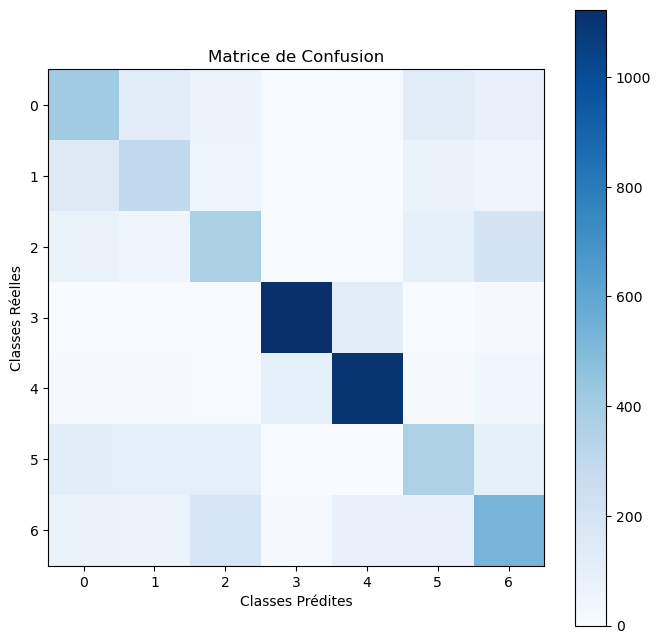

Rapport de Classification :
              precision    recall  f1-score   support

       angry       0.50      0.51      0.51       805
     disgust       0.47      0.48      0.47       620
        fear       0.48      0.47      0.48       794
       happy       0.90      0.89      0.90      1261
     neutral       0.84      0.86      0.85      1282
         sad       0.49      0.47      0.48       773
    surprise       0.53      0.52      0.52      1010

    accuracy                           0.64      6545
   macro avg       0.60      0.60      0.60      6545
weighted avg       0.64      0.64      0.64      6545



In [50]:
# Prédire les probabilités des classes sur l'ensemble de test
y_pred_probs = rgb_model.predict(rgb_x_test)

# Convertir les probabilités en classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Convertir les étiquettes encodées en classes réelles
rgb_y_test_classes = np.argmax(rgb_y_test_encoded, axis=1)

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(rgb_y_test_classes, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matrice de Confusion')
plt.colorbar()
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

# Afficher le rapport de classification
class_names = le.classes_
print("Rapport de Classification :")
print(classification_report(rgb_y_test_classes, y_pred, target_names=class_names))


205/205 [==============================] - 9s 42ms/step


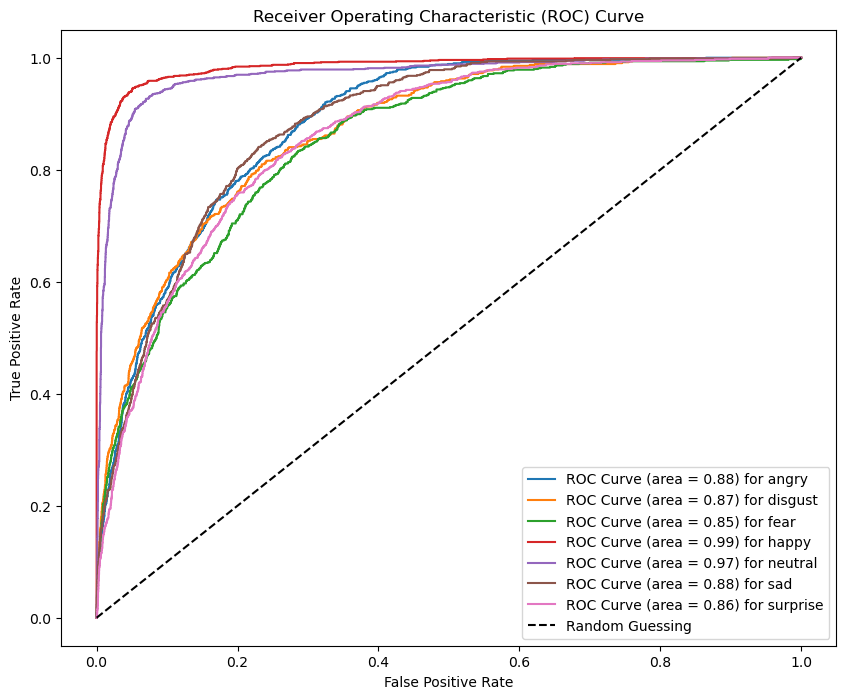

In [71]:
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour chaque classe
y_score = rgb_model.predict(rgb_x_test)

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(rgb_y_test_encoded[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Les prédictions du deuxiéme modele

1/1 [==============================] - 0s 38ms/step


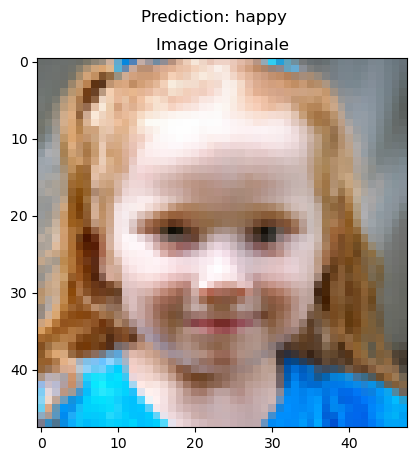

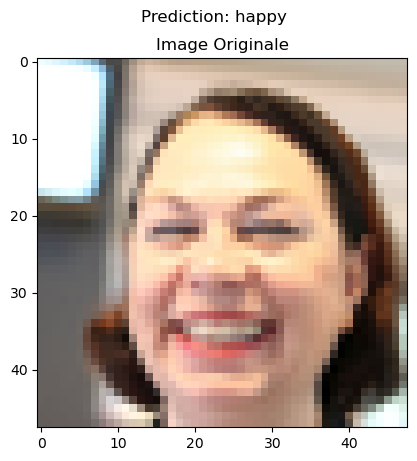

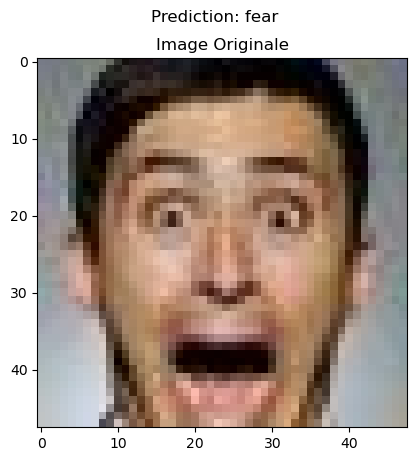

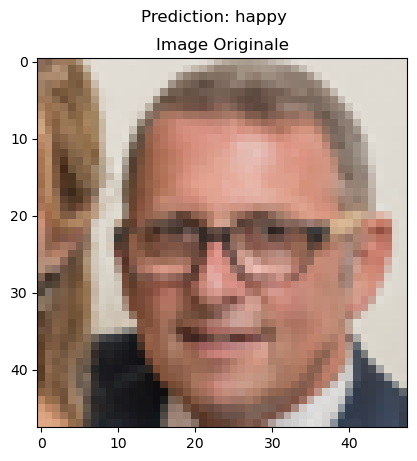

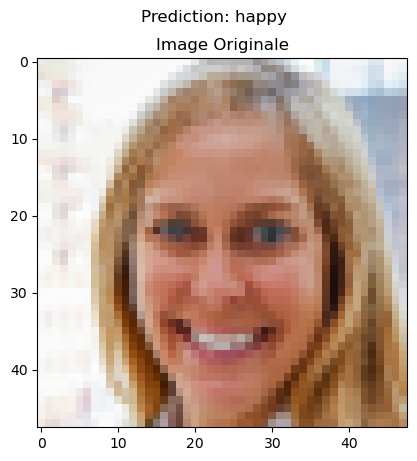

In [99]:

# Liste de toutes les images dans le dossier de test
all_test_images = []
for label in classes:
    label_path = os.path.join(RGB_TEST_DIR, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        image_paths = [os.path.join(label_path, img) for img in image_files]
        all_test_images.extend(image_paths)

# Nombre d'images à choisir au hasard
num_random_images = 5

# Choisissez des images au hasard
random_test_images = random.sample(all_test_images, num_random_images)

# Charger les images aléatoires en couleur (RGB)
random_images_rgb = []
for image_path in random_test_images:
    image = cv2.imread(image_path)
    if image is not None:
        # Assurez-vous que toutes les images ont les mêmes dimensions avant le redimensionnement
        target_size = (48, 48)  # ou la taille que vous avez utilisée lors de l'entraînement
        if image.shape[0] != target_size[0] or image.shape[1] != target_size[1]:
            image = cv2.resize(image, (target_size[1], target_size[0]))  # OpenCV utilise (largeur, hauteur)
        random_images_rgb.append(image)

# Vérifier si des images aléatoires ont été chargées
if len(random_images_rgb) > 0:
    # Convertir en tableau numpy et normaliser les valeurs des pixels
    random_images_rgb = np.array(random_images_rgb, dtype=np.float32) / 255.0

    # Faire des prédictions sur les images aléatoires avec le modèle RGB
    random_predictions_rgb = rgb_model.predict(random_images_rgb)

    # Afficher les prédictions pour chaque image aléatoire
    for i, (image_path, prediction) in enumerate(zip(random_test_images, random_predictions_rgb)):
        # Charger l'image originale
        original_image = cv2.imread(image_path)
        
        # Afficher l'image originale
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Image Originale")

        # Afficher la prédiction
        predicted_class = np.argmax(prediction)
        predicted_label = label_encoder.classes_[predicted_class]
        plt.suptitle(f"Prediction: {predicted_label}")
        
        # Afficher l'image avec la légende
        plt.show()
else:
    print("Aucune image aléatoire chargée.")

In [97]:
model.save("C:/Users/bdhia/OneDrive/Bureau/final deep learning/data_set/data_set2/modele_rgb.h5")


C:\Users\bdhia\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# combinaison des deux modeles et leur evaluation

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Prédire les classes sur l'ensemble de test pour chaque modèle
y_pred_prob_grayscale = model.predict(x_test)
y_pred_prob_rgb = rgb_model.predict(rgb_x_test)

# Obtenir la taille réelle des tableaux
taille_reelle_grayscale = y_pred_prob_grayscale.shape[0]
taille_reelle_rgb = y_pred_prob_rgb.shape[0]

# Spécifier la nouvelle forme désirée
desired_shape = (taille_reelle_grayscale, 7)

# Redimensionner les tableaux pour qu'ils aient la même forme
y_pred_prob_grayscale_resized = np.resize(y_pred_prob_grayscale, desired_shape)
y_pred_prob_rgb_resized = np.resize(y_pred_prob_rgb, desired_shape)

# Combinaison des probabilités en utilisant np.stack
y_combined_prob_stack = np.stack([y_pred_prob_grayscale_resized, y_pred_prob_rgb_resized], axis=0)

# Prendre la moyenne le long de l'axe ajouté 
y_combined_prob_avg = np.mean(y_combined_prob_stack, axis=0)

# Convertir les probabilités en classes 
y_combined_pred = np.argmax(y_combined_prob_avg, axis=1)

# Afficher la matrice de confusion et le rapport de classification pour les prédictions combinées
conf_matrix_combined = confusion_matrix(y_test_classes, y_combined_pred)
print("Matrice de Confusion combinée :")
print(conf_matrix_combined)

class_names = le.classes_
print("Rapport de Classification combiné :")
print(classification_report(y_test_classes, y_combined_pred, target_names=class_names))


205/205 [==============================] - 8s 41ms/step
Matrice de Confusion combinée :
[[ 559   88   68   26   53  120   43]
 [  19   76    2    2    1   10    1]
 [ 115  126  424   17   49  145  148]
 [   9    2   26 1390  309   11   26]
 [  37   23   28   62  908  144   31]
 [ 118   48  125   37  140  502  277]
 [ 114   22   37   17   10   35  596]]
Rapport de Classification combiné :
              precision    recall  f1-score   support

       angry       0.58      0.58      0.58       957
     disgust       0.20      0.68      0.31       111
        fear       0.60      0.41      0.49      1024
       happy       0.90      0.78      0.84      1773
     neutral       0.62      0.74      0.67      1233
         sad       0.52      0.40      0.45      1247
    surprise       0.53      0.72      0.61       831

    accuracy                           0.62      7176
   macro avg       0.56      0.62      0.56      7176
weighted avg       0.64      0.62      0.62      7176



205/205 [==============================] - 9s 42ms/step


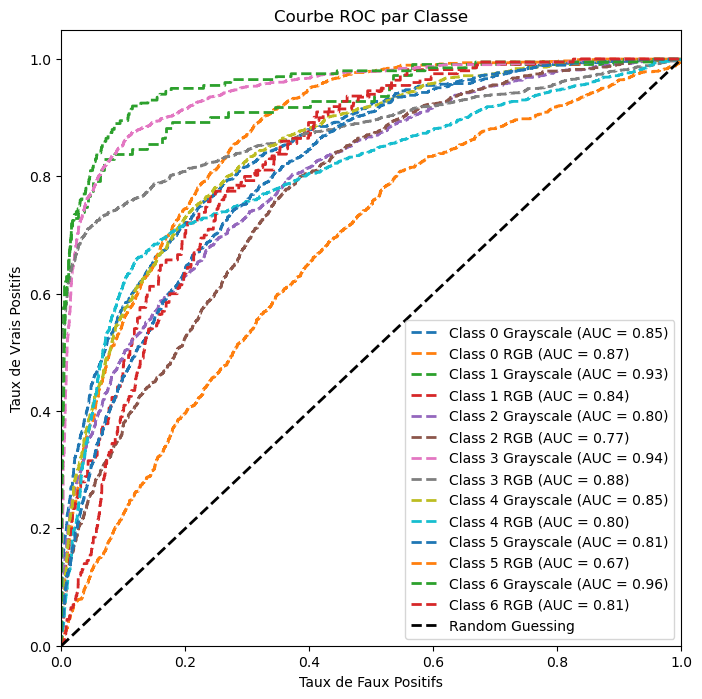

In [103]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariser les labels
y_test_bin = label_binarize(y_test_classes, classes=np.unique(y_test_classes))

# Prédire les probabilités pour chaque modèle
y_pred_prob_grayscale = model.predict(x_test)
y_pred_prob_rgb = rgb_model.predict(rgb_x_test)

# Vérifier et ajuster le nombre d'échantillons
min_samples = min(y_pred_prob_grayscale.shape[0], y_pred_prob_rgb.shape[0])
y_test_bin = y_test_bin[:min_samples, :]
y_pred_prob_grayscale = y_pred_prob_grayscale[:min_samples, :]
y_pred_prob_rgb = y_pred_prob_rgb[:min_samples, :]

# Calculer la courbe ROC pour chaque classe
fpr_grayscale = dict()
tpr_grayscale = dict()
roc_auc_grayscale = dict()
for i in range(num_classes):
    fpr_grayscale[i], tpr_grayscale[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_grayscale[:, i])
    roc_auc_grayscale[i] = auc(fpr_grayscale[i], tpr_grayscale[i])

fpr_rgb = dict()
tpr_rgb = dict()
roc_auc_rgb = dict()
for i in range(num_classes):
    fpr_rgb[i], tpr_rgb[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_rgb[:, i])
    roc_auc_rgb[i] = auc(fpr_rgb[i], tpr_rgb[i])

# Tracer les courbes ROC pour chaque classe
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr_grayscale[i], tpr_grayscale[i], lw=2, label=f'Class {i} Grayscale (AUC = {roc_auc_grayscale[i]:.2f})', linestyle='--')
    plt.plot(fpr_rgb[i], tpr_rgb[i], lw=2, label=f'Class {i} RGB (AUC = {roc_auc_rgb[i]:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC par Classe')
plt.legend(loc='lower right')
plt.show()


# Prédiction combinée des deux modeles

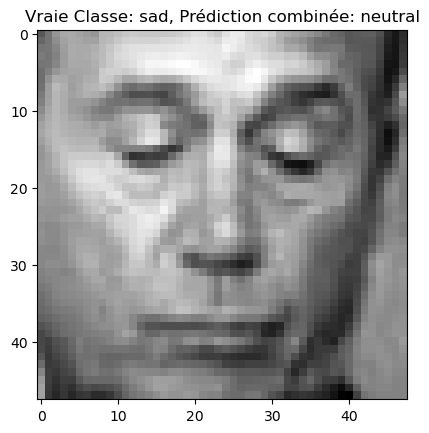

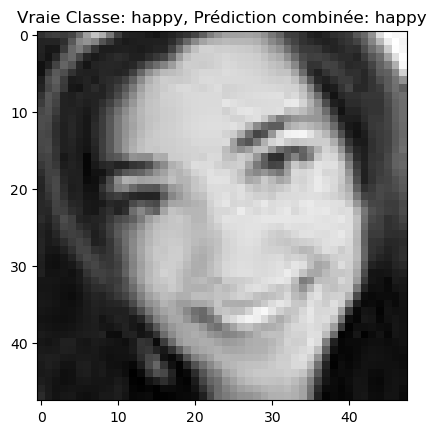

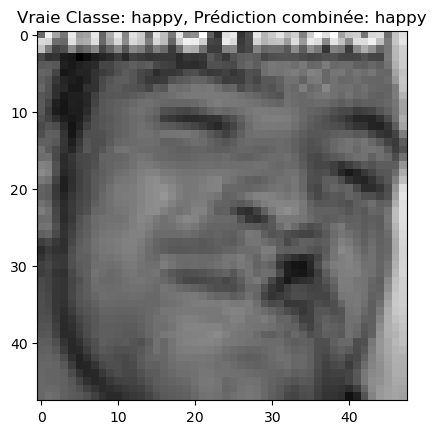

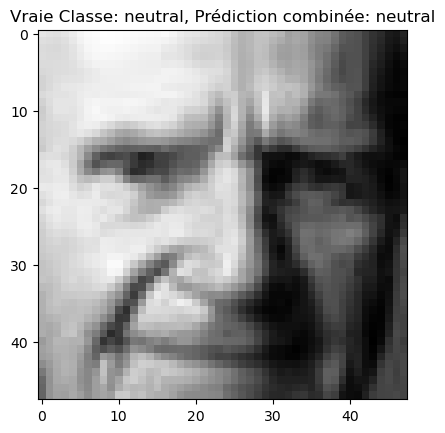

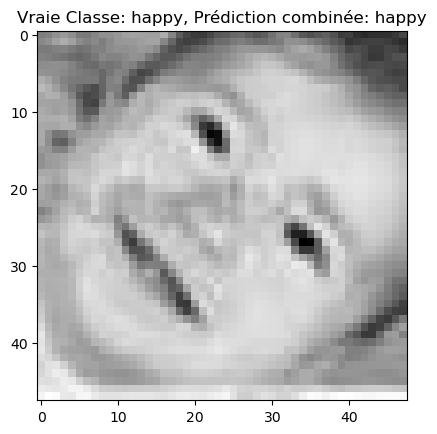

In [106]:
# Assurez-vous que les ensembles de test ont la même taille
min_size = min(y_pred_prob_grayscale.shape[0], y_pred_prob_rgb.shape[0])
y_pred_prob_grayscale = y_pred_prob_grayscale[:min_size]
y_pred_prob_rgb = y_pred_prob_rgb[:min_size]

# Combinaison des probabilités en prenant la moyenne
y_combined_prob_avg = (y_pred_prob_grayscale + y_pred_prob_rgb) / 2

# Prédire la classe en prenant l'indice de la probabilité maximale
y_combined_pred = np.argmax(y_combined_prob_avg, axis=1)

# Choisissez quelques images au hasard dans l'ensemble de test
num_images_to_display = 5
random_indices = random.sample(range(min_size), num_images_to_display)

# Afficher les images avec leurs prédictions
for i in random_indices:
    # Afficher l'image
    plt.imshow(x_test[i].reshape(48, 48), cmap='gray')  # Assurez-vous que la taille est correcte
    plt.title(f"Vraie Classe: {class_names[y_test_classes[i]]}, Prédiction combinée: {class_names[y_combined_pred[i]]}")
    plt.show()